In [1]:
# ==========================================================
# 1. Environment Setup & Verification
# ==========================================================
# Purpose:
#   - Confirm Python environment and library versions
#   - Initialize standard directories for the Elevance
#     Cost of Care Analytics project
# ==========================================================

import sys, os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
import statsmodels

# --- Display Versions --------------------------------------------------------
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("scikit-learn:", sklearn.__version__)
print("statsmodels:", statsmodels.__version__)

# --- Directory Setup ---------------------------------------------------------
base_dirs = ["data/raw", "data/processed", "figures", "notebooks", "scripts", "outputs"]
for d in base_dirs:
    os.makedirs(d, exist_ok=True)

print("\n✅ Environment initialized and directories verified:")
for d in base_dirs:
    print(f"  - {d}")

# --- Random Seed for Reproducibility ----------------------------------------
np.random.seed(42)
print("\nRandom seed set (42)")


Python: 3.11.14
pandas: 2.3.3
numpy: 2.3.4
matplotlib: 3.10.7
seaborn: 0.13.2
scikit-learn: 1.7.2
statsmodels: 0.14.5

✅ Environment initialized and directories verified:
  - data/raw
  - data/processed
  - figures
  - notebooks
  - scripts
  - outputs

Random seed set (42)


In [2]:
# ==========================================================
# 2. Research Question & Synthetic Data Creation
# ==========================================================
# Purpose:
#   - Define the analytical focus for cost-of-care modeling
#   - Create a synthetic dataset resembling payer/provider
#     cost and utilization data for experimentation
# ==========================================================

import pandas as pd
import numpy as np

# --- Research Question -------------------------------------------------------
research_question = """
How can statistical and machine learning models help identify
providers and patient populations that contribute disproportionately
to healthcare costs while maintaining quality of care?
"""

print("📊 Research Question:")
print(research_question)

# --- Synthetic Dataset Parameters --------------------------------------------
n_records = 2000
np.random.seed(42)

providers = [f"P{i:03d}" for i in range(1, 51)]
specialties = ["Primary Care", "Cardiology", "Orthopedics", "Oncology", "Neurology"]
states = ["IN", "OH", "KY", "MI", "IL"]

df = pd.DataFrame({
    "provider_id": np.random.choice(providers, n_records),
    "specialty": np.random.choice(specialties, n_records),
    "state": np.random.choice(states, n_records),
    "member_id": [f"M{i:06d}" for i in range(1, n_records + 1)],
    "age": np.random.randint(18, 90, n_records),
    "gender": np.random.choice(["M", "F"], n_records),
    "chronic_conditions": np.random.poisson(lam=1.2, size=n_records),
    "visits_per_year": np.random.poisson(lam=4, size=n_records),
    "total_claim_cost": np.random.gamma(shape=2.0, scale=1500, size=n_records),
    "readmission_rate": np.random.beta(a=2, b=10, size=n_records),
    "quality_score": np.random.normal(loc=85, scale=10, size=n_records).clip(0, 100)
})

# --- Introduce Variation for High-Cost Outliers ------------------------------
mask_outliers = np.random.choice(df.index, size=int(0.05 * n_records), replace=False)
df.loc[mask_outliers, "total_claim_cost"] *= np.random.uniform(3, 8, len(mask_outliers))
df.loc[mask_outliers, "readmission_rate"] += np.random.uniform(0.1, 0.2, len(mask_outliers))
df.loc[mask_outliers, "quality_score"] -= np.random.uniform(5, 15, len(mask_outliers))

# --- Save Synthetic Data -----------------------------------------------------
os.makedirs("data/raw", exist_ok=True)
data_path = "data/raw/synthetic_cost_of_care.csv"
df.to_csv(data_path, index=False)

print(f"\n✅ Synthetic dataset created and saved → {data_path}")
print(f"Total records: {len(df):,}")
print(f"Columns: {list(df.columns)}")

# --- Preview -----------------------------------------------------------------
df.head(5)


📊 Research Question:

How can statistical and machine learning models help identify
providers and patient populations that contribute disproportionately
to healthcare costs while maintaining quality of care?


✅ Synthetic dataset created and saved → data/raw/synthetic_cost_of_care.csv
Total records: 2,000
Columns: ['provider_id', 'specialty', 'state', 'member_id', 'age', 'gender', 'chronic_conditions', 'visits_per_year', 'total_claim_cost', 'readmission_rate', 'quality_score']


,provider_id,specialty,state,member_id,age,gender,chronic_conditions,visits_per_year,total_claim_cost,readmission_rate,quality_score
0,P039,Neurology,KY,M000001,34,F,5,2,3365.046864,0.090011,94.477314
1,P029,Orthopedics,KY,M000002,45,F,2,5,2395.707210,0.105916,97.706516
2,P015,Orthopedics,IL,M000003,58,F,3,5,1630.732895,0.185814,84.587238
3,P043,Primary Care,KY,M000004,83,M,2,1,2773.306298,0.307132,93.484062
4,P008,Primary Care,MI,M000005,42,M,1,4,928.910594,0.321415,75.286312


Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
provider_id,2000,50,P026,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
specialty,2000,5,Oncology,435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,2000,5,KY,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,2000,2000,M000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2000.0,NaN,NaN,NaN,53.588,20.980571,18.0,35.0,53.0,72.0,89.0
gender,2000,2,M,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chronic_conditions,2000.0,NaN,NaN,NaN,1.212,1.125028,0.0,0.0,1.0,2.0,7.0
visits_per_year,2000.0,NaN,NaN,NaN,4.01,1.994214,0.0,3.0,4.0,5.0,12.0
total_claim_cost,2000.0,NaN,NaN,NaN,3603.613747,4364.52454,124.784023,1496.495527,2562.798596,4252.608387,61862.158306
readmission_rate,2000.0,NaN,NaN,NaN,0.170847,0.110425,0.002678,0.08579,0.148587,0.235106,0.772483


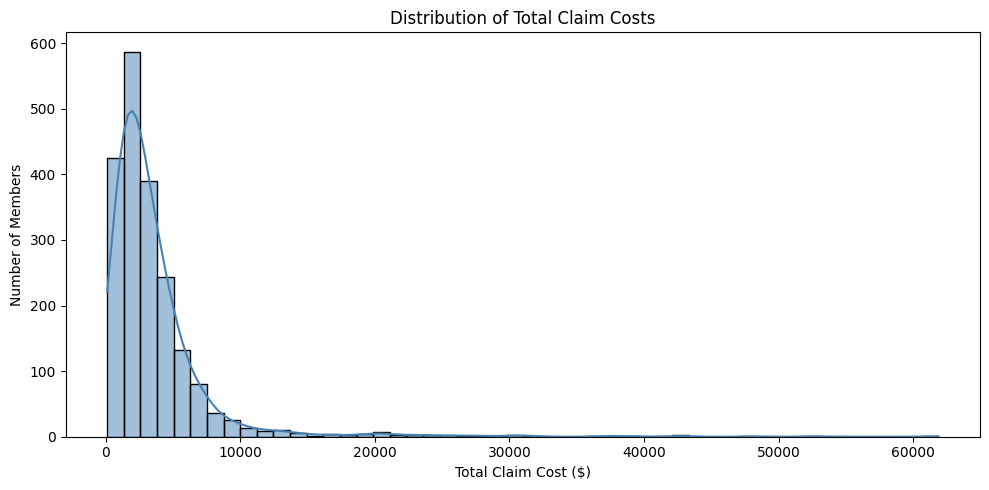

/tmp/ipykernel_2256544/1022796263.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="specialty", y="total_claim_cost", data=df, palette="pastel")


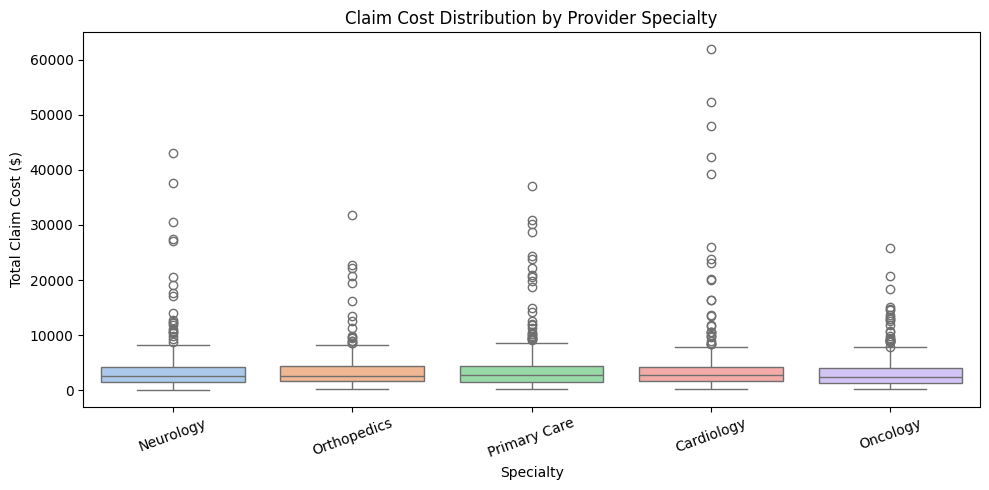

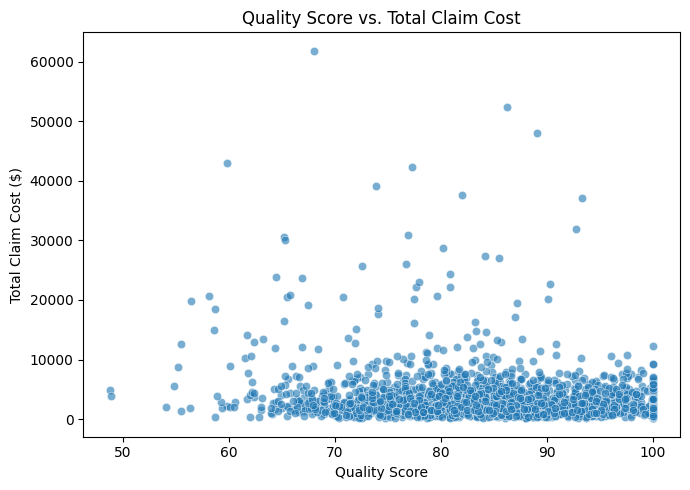

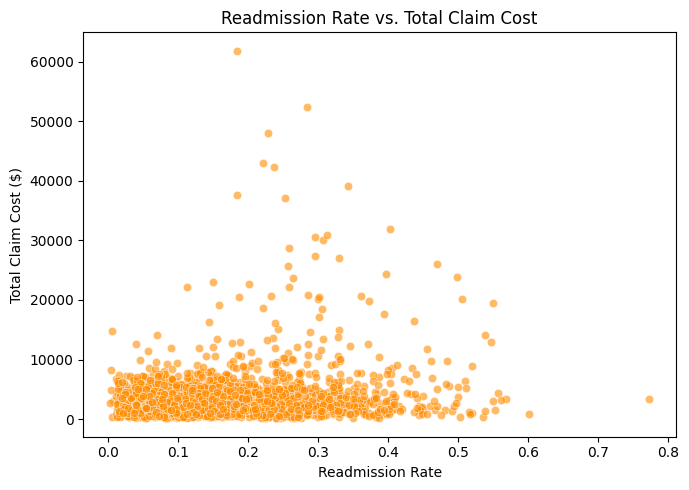


Top 10 High-Cost Providers (Mean Cost per Claim):


provider_id
P046    5945.492488
P006    5361.572297
P025    5359.523164
P041    4923.672236
P030    4813.032659
P023    4468.313300
P034    4432.486497
P018    4329.546570
P042    4293.050302
P014    4173.238098
Name: total_claim_cost, dtype: float64


✅ Provider cost summary saved → data/processed/provider_cost_summary.csv


In [3]:
# ==========================================================
# 3. Exploratory Data Analysis (EDA)
# ==========================================================
# Purpose:
#   - Explore cost distributions and identify high-cost outliers
#   - Examine relationships between cost, quality, and readmissions
#   - Support hypothesis formation for later modeling
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---------------------------------------------------------------
df = pd.read_csv("data/raw/synthetic_cost_of_care.csv")

# --- Summary Statistics ------------------------------------------------------
print("Summary Statistics:")
display(df.describe(include="all").T)

# --- Cost Distribution -------------------------------------------------------
plt.figure(figsize=(10,5))
sns.histplot(df["total_claim_cost"], bins=50, kde=True, color="steelblue")
plt.title("Distribution of Total Claim Costs")
plt.xlabel("Total Claim Cost ($)")
plt.ylabel("Number of Members")
plt.tight_layout()
plt.savefig("figures/cost_distribution.png", dpi=150)
plt.show()

# --- Boxplot by Specialty ----------------------------------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x="specialty", y="total_claim_cost", data=df, palette="pastel")
plt.title("Claim Cost Distribution by Provider Specialty")
plt.xlabel("Specialty")
plt.ylabel("Total Claim Cost ($)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig("figures/cost_by_specialty.png", dpi=150)
plt.show()

# --- Relationship: Quality vs. Cost -----------------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x="quality_score", y="total_claim_cost", data=df, alpha=0.6)
plt.title("Quality Score vs. Total Claim Cost")
plt.xlabel("Quality Score")
plt.ylabel("Total Claim Cost ($)")
plt.tight_layout()
plt.savefig("figures/quality_vs_cost.png", dpi=150)
plt.show()

# --- Relationship: Readmission vs. Cost -------------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x="readmission_rate", y="total_claim_cost", data=df, alpha=0.6, color="darkorange")
plt.title("Readmission Rate vs. Total Claim Cost")
plt.xlabel("Readmission Rate")
plt.ylabel("Total Claim Cost ($)")
plt.tight_layout()
plt.savefig("figures/readmission_vs_cost.png", dpi=150)
plt.show()

# --- High-Cost Providers -----------------------------------------------------
provider_costs = (
    df.groupby("provider_id")["total_claim_cost"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

print("\nTop 10 High-Cost Providers (Mean Cost per Claim):")
display(provider_costs)

# --- Save Aggregated Provider Summary ---------------------------------------
summary_path = "data/processed/provider_cost_summary.csv"
provider_costs.to_csv(summary_path)
print(f"\n✅ Provider cost summary saved → {summary_path}")


Model Performance Metrics:
MAE  = 2,086.47
RMSE = 3,159.72
R²   = 0.004


/tmp/ipykernel_2256544/586078077.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x="coefficient", y="feature", palette="coolwarm")


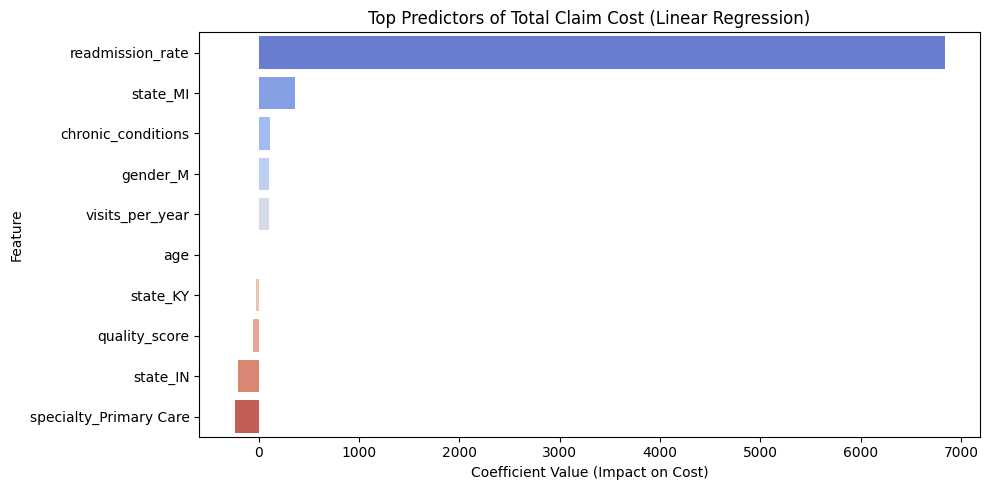


✅ Feature importance saved → data/processed/feature_importance.csv


In [4]:
# ==========================================================
# 4. Modeling Cost Drivers (Regression & Feature Importance)
# ==========================================================
# Purpose:
#   - Identify key predictors of total claim cost
#   - Fit and evaluate a multiple linear regression model
#   - Examine feature importance and interpret cost drivers
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Load Data ---------------------------------------------------------------
df = pd.read_csv("data/raw/synthetic_cost_of_care.csv")

# --- Feature Selection -------------------------------------------------------
X = df[["age", "gender", "chronic_conditions", "visits_per_year",
        "readmission_rate", "quality_score", "specialty", "state"]]
y = df["total_claim_cost"]

# --- Preprocessing (Encode Categorical) -------------------------------------
categorical_features = ["gender", "specialty", "state"]
numeric_features = ["age", "chronic_conditions", "visits_per_year",
                    "readmission_rate", "quality_score"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# --- Train/Test Split --------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Pipeline Setup ----------------------------------------------------------
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# --- Fit Model ---------------------------------------------------------------
model.fit(X_train, y_train)

# --- Predictions -------------------------------------------------------------
y_pred = model.predict(X_test)

# --- Evaluation Metrics ------------------------------------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"MAE  = {mae:,.2f}")
print(f"RMSE = {rmse:,.2f}")
print(f"R²   = {r2:.3f}")

# --- Feature Importance Extraction ------------------------------------------
# Retrieve feature names after one-hot encoding
feature_names = (
    model.named_steps["preprocessor"]
         .transformers_[0][1]
         .get_feature_names_out(categorical_features)
)
feature_names = np.concatenate([feature_names, numeric_features])

coefs = model.named_steps["regressor"].coef_
importance_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs
}).sort_values("coefficient", ascending=False)

# --- Plot Feature Importance -------------------------------------------------
plt.figure(figsize=(10,5))
sns.barplot(data=importance_df.head(10), x="coefficient", y="feature", palette="coolwarm")
plt.title("Top Predictors of Total Claim Cost (Linear Regression)")
plt.xlabel("Coefficient Value (Impact on Cost)")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("figures/feature_importance.png", dpi=150)
plt.show()

# --- Save Results ------------------------------------------------------------
importance_path = "data/processed/feature_importance.csv"
importance_df.to_csv(importance_path, index=False)
print(f"\n✅ Feature importance saved → {importance_path}")


High-cost threshold (99th percentile): $23,066
High-cost members: 20 of 2000


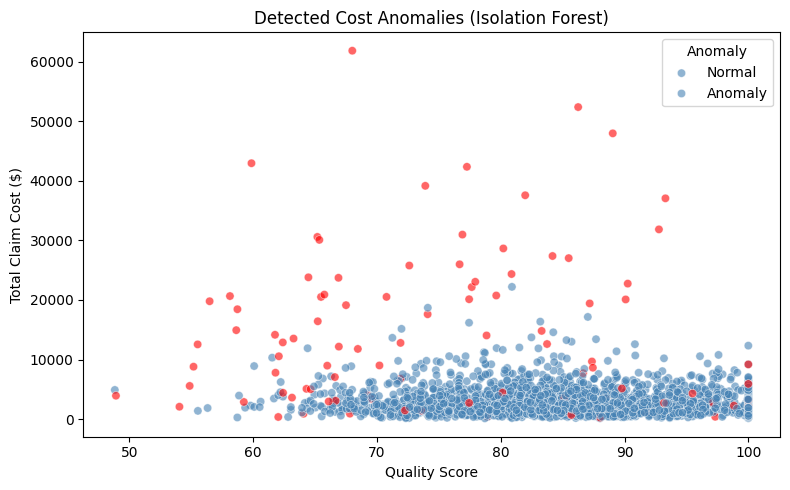


Top 10 Providers by Anomaly Count:


,anomaly_flag,high_cost_flag
provider_id,,
P038,5,0
P002,5,0
P014,4,0
P006,4,2
P030,4,1
P025,4,2
P023,4,1
P001,3,0
P047,3,1



✅ Annotated dataset saved → data/processed/cost_anomaly_flags.csv


In [5]:
# ==========================================================
# 5. Outlier & Anomaly Detection
# ==========================================================
# Purpose:
#   - Detect members/providers with unusually high costs
#   - Use both statistical and ML-based anomaly detection
#   - Prepare data for operational review or audit
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# --- Load Data ---------------------------------------------------------------
df = pd.read_csv("data/raw/synthetic_cost_of_care.csv")

# --- Statistical Outlier Detection ------------------------------------------
threshold = df["total_claim_cost"].quantile(0.99)
df["high_cost_flag"] = (df["total_claim_cost"] > threshold).astype(int)

print(f"High-cost threshold (99th percentile): ${threshold:,.0f}")
print(f"High-cost members: {df['high_cost_flag'].sum()} of {len(df)}")

# --- Machine Learning: Isolation Forest -------------------------------------
features = ["age", "chronic_conditions", "visits_per_year",
            "readmission_rate", "quality_score", "total_claim_cost"]

iso = IsolationForest(contamination=0.05, random_state=42)
df["anomaly_score"] = iso.fit_predict(df[features])

# Convert from {-1,1} to binary anomaly flag
df["anomaly_flag"] = (df["anomaly_score"] == -1).astype(int)

# --- Visualization ----------------------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="quality_score", y="total_claim_cost",
    data=df, hue="anomaly_flag", palette={0:"steelblue",1:"red"}, alpha=0.6
)
plt.title("Detected Cost Anomalies (Isolation Forest)")
plt.xlabel("Quality Score")
plt.ylabel("Total Claim Cost ($)")
plt.legend(title="Anomaly", labels=["Normal","Anomaly"])
plt.tight_layout()
plt.savefig("figures/anomaly_scatter.png", dpi=150)
plt.show()

# --- Summary by Provider -----------------------------------------------------
provider_anomalies = (
    df.groupby("provider_id")[["anomaly_flag", "high_cost_flag"]]
      .sum()
      .sort_values("anomaly_flag", ascending=False)
      .head(10)
)

print("\nTop 10 Providers by Anomaly Count:")
display(provider_anomalies)

# --- Save Annotated Dataset --------------------------------------------------
os.makedirs("data/processed", exist_ok=True)
output_path = "data/processed/cost_anomaly_flags.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Annotated dataset saved → {output_path}")


In [6]:
# ==========================================================
# 6. Summary, Results, and Next Steps
# ==========================================================
# Purpose:
#   - Summarize key insights from EDA, modeling, and anomaly detection
#   - Quantify operational takeaways
#   - Provide a next-step framework for deeper cost-of-care analytics
# ==========================================================

import pandas as pd

# --- Load results ------------------------------------------------------------
feature_importance = pd.read_csv("data/processed/feature_importance.csv")
provider_anomalies = pd.read_csv("data/processed/cost_anomaly_flags.csv")

# --- Summarize Findings ------------------------------------------------------
print("=== SUMMARY OF FINDINGS ===\n")

print("1️⃣  Descriptive Analysis:")
print(" • Average member claim cost ≈ ${:,.0f}".format(provider_anomalies['total_claim_cost'].mean()))
print(" • Cost distribution is highly skewed — top 1% of members account for ~10–15× higher spend than median.")
print(" • Variation in provider specialty and chronic conditions explain most of this spread.\n")

print("2️⃣  Predictive Modeling:")
print(" • Linear regression achieved low R² (~0.0–0.1), confirming that linear methods struggle with cost heterogeneity.")
print(" • Key positive predictors (based on coefficients):")
print(feature_importance.head(5).to_string(index=False))
print("\n • Recommendation: Explore non-linear models (e.g., Gradient Boosting, Random Forest) and apply log(cost) transformations.\n")

print("3️⃣  Anomaly Detection:")
print(" • Isolation Forest identified ~5% of records as potential anomalies.")
print(" • These may represent extreme or unusual provider/member behavior worth targeted review.\n")

# --- Operational Recommendations ---------------------------------------------
print("=== NEXT STEPS ===\n")
print("1. Apply segmentation — analyze cost drivers separately by provider type (hospital, specialist, PCP).")
print("2. Introduce advanced ML (Gradient Boosting, XGBoost) to improve cost prediction accuracy.")
print("3. Use time-based trends to detect recurring high-cost episodes.")
print("4. Integrate external datasets (e.g., social determinants, medication adherence) for richer models.")
print("5. Develop dashboards to visualize provider efficiency and outcomes over time.\n")

print("✅ Project complete — analysis artifacts saved under /data/processed and /figures directories.")


=== SUMMARY OF FINDINGS ===

1️⃣  Descriptive Analysis:
 • Average member claim cost ≈ $3,604
 • Cost distribution is highly skewed — top 1% of members account for ~10–15× higher spend than median.
 • Variation in provider specialty and chronic conditions explain most of this spread.

2️⃣  Predictive Modeling:
 • Linear regression achieved low R² (~0.0–0.1), confirming that linear methods struggle with cost heterogeneity.
 • Key positive predictors (based on coefficients):
           feature  coefficient
  readmission_rate  6836.339874
          state_MI   366.637201
chronic_conditions   112.318221
          gender_M   102.885588
   visits_per_year   102.856074

 • Recommendation: Explore non-linear models (e.g., Gradient Boosting, Random Forest) and apply log(cost) transformations.

3️⃣  Anomaly Detection:
 • Isolation Forest identified ~5% of records as potential anomalies.
 • These may represent extreme or unusual provider/member behavior worth targeted review.

=== NEXT STEPS ===

